In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import time
import glob
import warnings
warnings.filterwarnings('ignore')


#data
path = "./data/data_daily"
all_files = glob.glob(path + "/*.csv")   #把所有的数据文件文件名读取在一起

li = []


for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)


frame = pd.concat(li, axis=0, ignore_index=True)
result_df = frame.sort_values(by=['code', 'date'], ascending=True)

100%|██████████| 949/949 [00:07<00:00, 133.62it/s]


In [ ]:
def fly(dfs: dict[str, pd.DataFrame]):
    aggtrades = dfs["aggtrades"]
    ret = pd.DataFrame(index=aggtrades.index)
    ret["fly"] = (
        aggtrades[NOTIONAL].rolling(60, min_periods=1).corr(aggtrades[CLOSE])
    )
    ret = ret.replace([np.inf, -np.inf], np.nan).fillna(0).reset_index()
    return {"fly": ret}

In [2]:
result_df = result_df.reset_index(drop=True)
result_df

,date,code,open,close,low,high,volume,money,turnover_ratio
0,2020-01-02,000001.XSHE,1976.78,2002.90,1964.91,2012.40,1288881.0,2.571196e+09,0.7885
1,2020-01-03,000001.XSHE,2011.21,2039.71,2008.84,2055.14,940146.0,1.914495e+09,0.5752
2,2020-01-06,000001.XSHE,2019.52,2026.65,2007.65,2058.70,726114.0,1.477930e+09,0.4442
3,2020-01-07,000001.XSHE,2033.77,2036.14,2012.40,2051.58,613690.0,1.247047e+09,0.3755
4,2020-01-08,000001.XSHE,2018.34,1977.97,1974.41,2024.27,714104.0,1.423609e+09,0.4369
...,...,...,...,...,...,...,...,...,...
4253855,2023-11-24,689009.XSHG,34.88,35.28,34.88,35.88,10815571.0,3.834648e+08,2.0661
4253856,2023-11-27,689009.XSHG,35.24,34.89,34.62,35.60,6348515.0,2.225542e+08,1.2128
4253857,2023-11-28,689009.XSHG,34.90,34.36,34.01,35.17,5755962.0,1.979950e+08,1.0996
4253858,2023-11-29,689009.XSHG,34.59,33.27,33.09,34.59,6423819.0,2.155980e+08,1.2271


In [3]:
ziduan_list = ['open','close','low','high','volume','money','turnover_ratio']

for ziduan in tqdm(ziduan_list):
    exec(f"{ziduan} = result_df.pivot(index='date', columns='code', values='{ziduan}')")
    exec(f"{ziduan}.to_pickle('./data/data_daily_pkl/{ziduan}.pkl')")

100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


In [21]:
money

code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,688787.XSHG,688788.XSHG,688789.XSHG,688793.XSHG,688798.XSHG,688799.XSHG,688800.XSHG,688819.XSHG,688981.XSHG,689009.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2.571196e+09,3.342374e+09,4.014498e+07,32661410.56,6.745287e+07,35694686.29,1.392082e+08,1.559130e+09,1.328221e+07,34098873.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.914495e+09,2.584310e+09,2.977932e+07,25660052.61,9.046555e+07,31958868.50,1.156738e+08,1.154802e+09,6.739342e+06,28593488.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1.477930e+09,2.761449e+09,4.430487e+07,28986355.81,5.841142e+07,42196105.36,1.311478e+08,8.697121e+08,8.295034e+06,32069322.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1.247047e+09,1.827511e+09,3.829974e+07,47208301.59,4.780185e+07,36200756.00,1.194920e+08,2.024670e+09,2.664154e+07,36145655.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.423609e+09,1.667144e+09,3.457406e+07,74182587.20,5.820240e+07,39568663.74,1.413090e+08,1.714402e+09,1.121294e+07,34674158.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,6.914234e+08,1.306244e+09,1.943279e+08,8812007.00,5.015247e+08,4361828.00,6.750636e+07,1.559883e+08,1.030523e+08,96113528.00,...,184228396.0,18327642.0,40621994.0,22925669.0,100098017.0,42714973.0,60436326.0,39167534.0,9.814100e+08,383464795.0
2023-11-27,8.362684e+08,1.175277e+09,1.238234e+08,11672578.00,3.117507e+08,7288568.00,5.605835e+07,1.915357e+08,1.254723e+08,80165494.00,...,160720305.0,16481425.0,40170553.0,35624502.0,118449972.0,45111169.0,66726626.0,41631555.0,1.242798e+09,222554218.0
2023-11-28,7.844058e+08,5.726709e+08,1.310711e+08,4671059.00,1.856993e+08,1864812.00,8.428684e+07,1.604381e+08,1.073993e+08,50509925.00,...,151614054.0,18659611.0,32134702.0,39010410.0,83255382.0,31159221.0,56048123.0,62848815.0,8.406975e+08,197995030.0


In [4]:
# def ts_mean():
    
# def ts_sum():
    
# def correlation():
    
# def covariance():

# def ts_max():

# def ts_min():

In [5]:
def ts_mean(df):
    return df.rolling(20).mean()

In [6]:
close

code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,688787.XSHG,688788.XSHG,688789.XSHG,688793.XSHG,688798.XSHG,688799.XSHG,688800.XSHG,688819.XSHG,688981.XSHG,689009.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2002.90,4491.14,166.27,32.10,248.58,115.13,99.40,66.66,45.33,35.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,2039.71,4420.80,166.42,32.20,252.27,114.64,100.47,64.06,45.33,35.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,2026.65,4346.31,161.95,32.20,251.35,114.28,99.93,70.46,45.59,35.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,2036.14,4380.80,164.56,32.71,252.73,114.64,101.54,71.67,47.06,35.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1977.97,4369.76,162.17,32.20,248.12,113.32,99.67,71.17,46.66,34.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,1281.99,2046.78,134.25,14.62,252.00,60.15,65.86,116.96,47.32,43.52,...,103.83,55.60,141.77,55.68,106.93,47.40,61.55,32.34,54.09,35.28
2023-11-27,1270.56,1992.74,134.70,14.31,241.67,58.95,65.86,117.97,45.59,42.46,...,104.69,55.93,146.46,54.72,109.07,46.70,62.41,31.88,54.61,34.89
2023-11-28,1262.95,1984.29,132.76,14.31,241.16,59.31,66.67,118.58,44.93,42.06,...,105.16,57.02,145.46,54.09,108.19,47.09,63.58,32.51,54.55,34.36


In [ ]:
'ts_mean(open)'
'ts_mean(close)'

In [7]:
eval('ts_mean(open)')

code,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,688787.XSHG,688788.XSHG,688789.XSHG,688793.XSHG,688798.XSHG,688799.XSHG,688800.XSHG,688819.XSHG,688981.XSHG,689009.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,1316.5740,1984.9690,132.8130,14.4545,236.6640,60.7640,64.1005,111.2000,50.4000,41.6910,...,103.7050,56.4930,147.8620,54.0545,114.5215,47.2945,60.3130,33.3495,55.6170,33.7140
2023-11-27,1314.6070,1989.1905,133.3270,14.4700,237.8255,60.8300,64.2350,111.9015,50.2070,41.7910,...,104.1730,56.5650,147.6010,54.2790,114.8755,47.3470,60.7210,33.2520,55.4845,33.8455
2023-11-28,1311.8145,1991.2170,133.6210,14.4595,238.7550,60.8540,64.3560,112.5425,49.8480,41.9305,...,104.5705,56.5600,147.4230,54.4510,114.4485,47.2035,61.0020,33.1625,55.3000,33.9355


In [8]:
ret = close.pct_change()
ret.to_pickle('./data/data_daily_pkl/ret.pkl')

In [9]:
def calculate_stock_factor(stock_returns, stock_amounts):
    # 滚动窗口处理
    rolling_windows = stock_amounts.rolling(window=20)

    M_high_values = []
    M_low_values = []

    for window in rolling_windows:
        if len(window) < 20:
            # 忽略小于20天的窗口
            continue

        # 窗口内成交金额最高的10天
        high_days = window.nlargest(10).index
        M_high = stock_returns.loc[high_days].sum()

        # 窗口内成交金额最低的10天
        low_days = window.nsmallest(10).index
        M_low = stock_returns.loc[low_days].sum()

        M_high_values.append(M_high)
        M_low_values.append(M_low)

    # 计算 M_high - M_low
    M_diff = np.array(M_high_values) - np.array(M_low_values)

    return M_diff

# 计算每支股票的因子
factors = {}
for stock in tqdm(ret.columns[:20]):
    factors[stock] = calculate_stock_factor(ret[stock], money[stock])

factor_df = pd.DataFrame(factors,index=ret.index[19:])

100%|██████████| 20/20 [00:08<00:00,  2.28it/s]


In [10]:
factor_df

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,000012.XSHE,000014.XSHE,000016.XSHE,000017.XSHE,000018.XSHE,000019.XSHE,000020.XSHE,000021.XSHE,000023.XSHE,000025.XSHE
date,,,,,,,,,,,,,,,,,,,,
2020-02-06,-0.030582,-0.005938,0.197693,0.025029,-0.015284,0.241380,0.164534,0.075513,0.136012,0.011772,0.124345,0.079504,0.012488,-0.066747,0.0,0.195958,0.083226,0.220261,0.141337,0.108658
2020-02-07,-0.033232,-0.035795,0.242710,0.073043,-0.024096,0.265103,0.127603,0.062865,0.130020,0.025256,0.057947,0.080723,-0.088312,-0.128449,0.0,0.181818,0.116695,0.247053,0.155036,0.094568
2020-02-10,-0.059820,0.022411,0.261495,0.086837,-0.027457,0.365437,0.046068,0.202081,0.124285,-0.002592,0.167031,0.063403,0.034421,-0.143494,0.0,0.201570,-0.025019,0.246888,0.170045,0.151452
2020-02-11,-0.033417,0.026410,0.258858,0.093654,-0.008571,0.338504,0.043941,0.088395,0.130020,0.027141,0.224044,0.093833,0.040434,-0.044487,0.0,0.182496,-0.093200,0.181832,0.185930,0.209345
2020-02-12,-0.027385,0.034346,0.262782,0.052609,-0.005225,0.339445,0.073995,0.085194,0.065420,0.011467,0.262117,0.024213,0.165081,-0.079405,0.0,0.178100,-0.105846,0.273106,0.191589,0.165156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,0.001085,0.144878,0.199542,0.049545,0.129979,0.061291,0.037199,0.127787,0.130852,0.050559,0.031658,0.084791,0.020690,0.014351,0.0,0.075904,0.086049,-0.054238,-0.013089,0.053241
2023-11-27,-0.007831,0.143925,0.216609,0.035917,0.075281,0.026681,0.037199,0.129872,0.194730,0.065654,0.020713,0.070469,0.039558,0.012134,0.0,0.053931,0.037978,-0.036204,-0.022834,0.013221
2023-11-28,-0.000884,0.143412,0.138476,0.043550,0.050816,-0.035640,0.041057,0.120879,0.092875,0.060741,0.020405,0.089589,0.025762,0.009994,0.0,0.048541,0.036675,0.060695,-0.039641,0.006188


In [11]:
import multiprocessing as mp

def calculate_stock_factor(stock_data):
    stock, stock_returns, stock_amounts = stock_data
    rolling_windows = stock_amounts.rolling(window=20)

    M_high_values = []
    M_low_values = []

    for window in rolling_windows:
        if len(window) < 20:
            continue

        high_days = window.nlargest(10).index
        M_high = stock_returns.loc[high_days].sum()

        low_days = window.nsmallest(10).index
        M_low = stock_returns.loc[low_days].sum()

        M_high_values.append(M_high)
        M_low_values.append(M_low)

    M_diff = np.array(M_high_values) - np.array(M_low_values)
    return stock, M_diff

# 使用 multiprocessing 并行计算
def parallel_factor_calculation(returns_df, trading_amount_df):
    pool = mp.Pool(8)
    
    # 准备数据
    stock_data = [(stock, returns_df[stock], trading_amount_df[stock]) for stock in returns_df.columns]

    # 并行处理
    results = pool.map(calculate_stock_factor, stock_data)

    # 关闭进程池并等待所有进程完成
    pool.close()
    pool.join()

    # 处理结果
    factor_data = {stock: M_diff for stock, M_diff in results}
    return pd.DataFrame(factor_data)

In [12]:
from factor_cut import parallel_factor_calculation
# %%time
# 调用函数进行计算
factor_df = parallel_factor_calculation(ret, money)

In [13]:
factor_df.index = ret.index[19:]
factor_df

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,688787.XSHG,688788.XSHG,688789.XSHG,688793.XSHG,688798.XSHG,688799.XSHG,688800.XSHG,688819.XSHG,688981.XSHG,689009.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2020-02-06,-0.030582,-0.005938,0.197693,0.025029,-0.015284,0.241380,0.164534,0.075513,0.136012,0.011772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-07,-0.033232,-0.035795,0.242710,0.073043,-0.024096,0.265103,0.127603,0.062865,0.130020,0.025256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-10,-0.059820,0.022411,0.261495,0.086837,-0.027457,0.365437,0.046068,0.202081,0.124285,-0.002592,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-11,-0.033417,0.026410,0.258858,0.093654,-0.008571,0.338504,0.043941,0.088395,0.130020,0.027141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-12,-0.027385,0.034346,0.262782,0.052609,-0.005225,0.339445,0.073995,0.085194,0.065420,0.011467,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,0.001085,0.144878,0.199542,0.049545,0.129979,0.061291,0.037199,0.127787,0.130852,0.050559,...,0.029943,0.163179,0.167396,0.150836,0.247721,0.008075,0.362455,0.033962,-0.039354,0.064892
2023-11-27,-0.007831,0.143925,0.216609,0.035917,0.075281,0.026681,0.037199,0.129872,0.194730,0.065654,...,0.053747,0.098061,0.096648,0.124366,0.011875,-0.023555,0.322750,0.053647,-0.077649,0.064637
2023-11-28,-0.000884,0.143412,0.138476,0.043550,0.050816,-0.035640,0.041057,0.120879,0.092875,0.060741,...,0.018066,0.130014,0.076821,0.082503,0.028019,0.032500,0.284630,0.052761,-0.043422,0.099331


In [14]:
long_format_factor = factor_df.reset_index().melt(id_vars=['date'], var_name='code', value_name='ideal_reverse')
long_format_factor.tail()

,date,code,ideal_reverse
4840645,2023-11-24,689009.XSHG,0.064892
4840646,2023-11-27,689009.XSHG,0.064637
4840647,2023-11-28,689009.XSHG,0.099331
4840648,2023-11-29,689009.XSHG,0.073984
4840649,2023-11-30,689009.XSHG,0.070959


In [15]:
#将日期列转换为datetime类型
df = long_format_factor
df['date']=pd.to_datetime(df['date'])

#保存文件夹路径
output_folder='./feature/factor_1_9_ideal_reverse'
selected_columns=['code', 'date', 'ideal_reverse']

os.makedirs(output_folder,exist_ok=True)

#创建日期索引并检查是否在dateframe中存在
date_index=pd.date_range(df['date'].min(),df['date'].max(),freq='D')
existing_dates=[d for d in date_index if d in df['date'].values]

#遍历每个日期如果它在dataframe中存在 则将其保存为单独的csv文件
for date in tqdm(existing_dates):
    group=df.loc[df['date']==date,selected_columns]
    filename=os.path.join(output_folder,f'{date.strftime("%Y-%m-%d")}.csv')
    group=group.sort_values(by='code',ascending=True)
    group = group.drop(columns = ['date'])
    group.to_csv(filename,index=False)

100%|██████████| 930/930 [01:05<00:00, 14.24it/s]


100%|██████████| 930/930 [00:33<00:00, 28.10it/s]


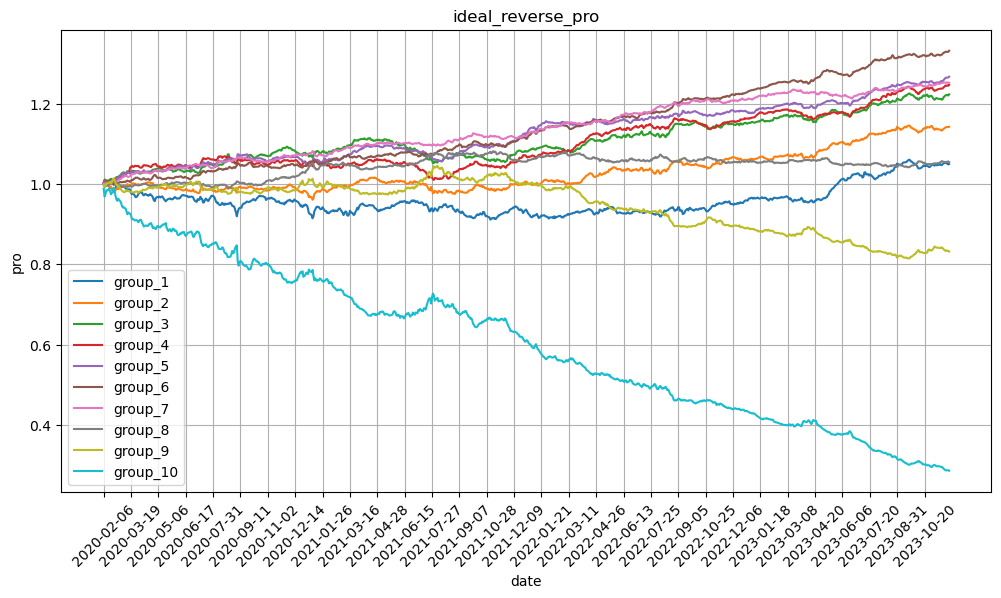

,factor_name,ic:,icir:,多头收益率:,多头波动率:,多头ir:,多头最大回撤:,对冲收益率:,对冲波动率:,对冲ir:,对冲最大回撤:
0,ideal_reverse,-0.016,-0.199,0.096,0.181,0.529,29.3,0.351,0.108,3.236,11.1


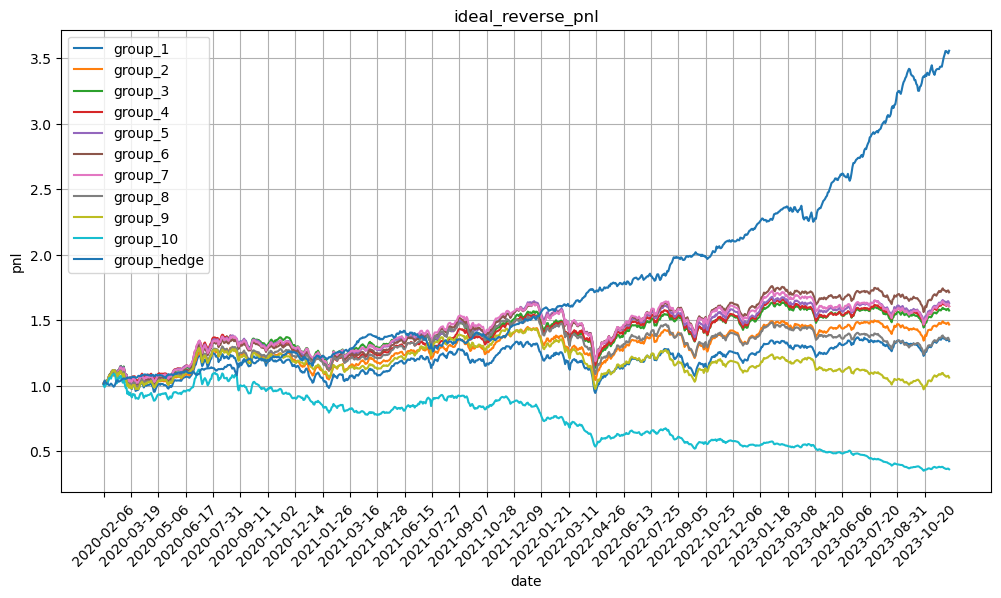

In [22]:
from backtest.backtest import BacktestAnalyzer
start_date = '2020-02-06'
end_date = '2023-11-29'
trade_date = './data/date.pkl'
factor_path = './feature/factor_1_9_ideal_reverse'
ret_path = './data/data_ret'
ud_path = './data/data_ud_new'
group = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

analyzer = BacktestAnalyzer(start_date, end_date, trade_date, factor_path, ret_path, ud_path, group)
analyzer.prepare_data()
analyzer.calculate_effectiveness()
analyzer.result

In [17]:
import numpy as np

def tsp_dp(distances):
    num_cities = len(distances)
    all_sets = (1 << num_cities) - 1
    memo = np.full((num_cities, 1 << num_cities), -1, dtype=float)

    def tsp_dp_helper(current, state):
        if state == all_sets:
            return distances[current][0]  # 回到起始城市

        if memo[current, state] != -1:
            return memo[current, state]

        min_cost = float('inf')
        for next_city in range(num_cities):
            if (state >> next_city) % 2 == 0:
                new_state = state | (1 << next_city)
                cost = distances[current][next_city] + tsp_dp_helper(next_city, new_state)
                min_cost = min(min_cost, cost)

        memo[current, state] = min_cost
        return min_cost

    return tsp_dp_helper(0, 1)

# 示例：定义城市间的距离矩阵
distances_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

# 求解旅行商问题
optimal_cost = tsp_dp(distances_matrix)

print("最短路径的总距离:", optimal_cost)


最短路径的总距离: 80


In [18]:
import numpy as np
import random

# 示例：定义城市间的距离矩阵
distances_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

num_cities = len(distances_matrix)
population_size = 10
num_generations = 100
mutation_rate = 0.2

# 初始化种群
def initialize_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

# 计算路径长度
def calculate_distance(path, distances_matrix):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += distances_matrix[path[i], path[i+1]]
    total_distance += distances_matrix[path[-1], path[0]]  # 回到起始城市
    return total_distance

# 选择父代
def select_parents(population, distances_matrix):
    parents = random.sample(population, 2)
    return min(parents, key=lambda x: calculate_distance(x, distances_matrix))

# 交叉操作
def crossover(parent1, parent2):
    start = random.randint(0, len(parent1) - 1)
    end = random.randint(start + 1, len(parent1))
    child = [-1] * len(parent1)
    child[start:end] = parent1[start:end]
    remaining = [gene for gene in parent2 if gene not in child]
    index = 0
    for i in range(len(child)):
        if child[i] == -1:
            child[i] = remaining[index]
            index += 1
    return child

# 变异操作
def mutate(individual):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# 遗传算法主循环
def genetic_algorithm(distances_matrix):
    population = initialize_population(population_size, num_cities)

    for generation in range(num_generations):
        population = sorted(population, key=lambda x: calculate_distance(x, distances_matrix))
        best_individual = population[0]

        new_population = [best_individual]

        for _ in range(population_size - 1):
            parent1 = select_parents(population, distances_matrix)
            parent2 = select_parents(population, distances_matrix)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    best_path = population[0]
    best_distance = calculate_distance(best_path, distances_matrix)
    return best_path, best_distance

# 运行遗传算法
best_path, best_distance = genetic_algorithm(distances_matrix)

print("最短路径:", best_path)
print("最短路径的总距离:", best_distance)


最短路径: [3, 1, 0, 2]
最短路径的总距离: 80


In [19]:
np.mean([1, np.nan, 2])

nan